In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse=pd.read_csv('mouse_drug_data.csv')
clinic=pd.read_csv('clinicaltrial_data.csv')
# Combine the data into a single dataset
pharma=pd.merge(clinic,mouse,on='Mouse ID',how='left')

# Display the data table for preview
pharma.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group=pharma.groupby(['Drug','Timepoint'])
tumorvol=group['Tumor Volume (mm3)'].mean()
tumorvol.reset_index().head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem=group['Tumor Volume (mm3)'].sem()
tumor_sem.reset_index().head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
munging=pharma[['Timepoint','Drug','Tumor Volume (mm3)']]
response=pd.pivot_table(munging, values = 'Tumor Volume (mm3)', index=['Timepoint'], columns = 'Drug')
response

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [6]:
x=list(response.index)
tumor_s=group['Tumor Volume (mm3)'].sem()
tumor_sem=tumor_s.unstack('Drug')
tumor_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


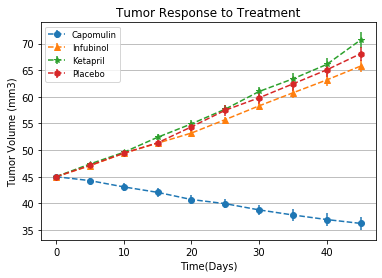

In [148]:
fig, ax = plt.subplots()
ax.errorbar(x, response['Capomulin'], yerr=tumor_sem['Capomulin'], fmt="--",marker="o",label='Capomulin')
ax.errorbar(x, response['Infubinol'], yerr=tumor_sem['Infubinol'], fmt="--",marker="^",label='Infubinol')
ax.errorbar(x, response['Ketapril'], yerr=tumor_sem['Ketapril'], fmt="--",marker="*",label='Ketapril')
ax.errorbar(x, response['Placebo'], yerr=tumor_sem['Placebo'], fmt="--",marker="h",label='Placebo')
ax.yaxis.grid()
ax.set_xlabel("Time(Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title('Tumor Response to Treatment')
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.savefig('Vol treatment.png')

## Metastatic Response to Treatment

In [8]:
metastatic=group['Metastatic Sites'].mean()
meta=pd.DataFrame(metastatic)
meta

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
...                               ...
Zoniferol 25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [9]:
metas=group['Metastatic Sites'].sem()
meta_s=pd.DataFrame(metas)
meta_s.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [83]:
meta_sem=meta_s.unstack('Drug')

In [ ]:
# df.droplevel('level_2', axis=1)
# meta_sem1=meta_sem.droplevel('Metastatic Sites',axis=0)
# meta_sem1.columns=meta_sem1.columns.droplevel(0)

In [26]:
result_spread=pd.pivot_table(meta, values = 'Metastatic Sites', index=['Timepoint'], columns = 'Drug')
result_spread

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


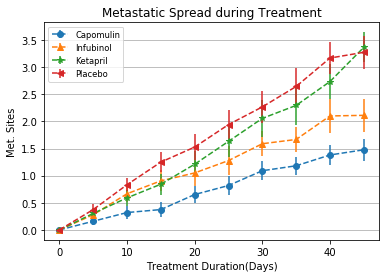

In [147]:
fig,ax=plt.subplots()
ax.errorbar(x,result_spread['Capomulin'],yerr=meta_sem['Metastatic Sites','Capomulin'],fmt='--',marker='o',label='Capomulin')
ax.errorbar(x,result_spread['Infubinol'],yerr=meta_sem['Metastatic Sites','Infubinol'],fmt='--',marker='^',label='Infubinol')
ax.errorbar(x,result_spread['Ketapril'],yerr=meta_sem['Metastatic Sites','Ketapril'],fmt='--',marker='*',label='Ketapril')
ax.errorbar(x,result_spread['Placebo'],yerr=meta_sem['Metastatic Sites','Placebo'],fmt='--',marker='<',label='Placebo')
ax.yaxis.grid()
ax.set_xlabel("Treatment Duration(Days)")
ax.set_ylabel("Met. Sites")
ax.set_title('Metastatic Spread during Treatment')
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.savefig('metastatic.png')

## Survival Rates

In [33]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame
tumorvol=group['Tumor Volume (mm3)'].mean()
tumorvol.reset_index().head()
# Preview DataFrame
surv=group['Mouse ID'].count()
survival=surv.reset_index()
survival.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [34]:
result_survival=pd.pivot_table(survival, values = 'Mouse ID', index=['Timepoint'], columns = 'Drug')
result_survival

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [40]:
pctchange=result_survival[['Capomulin','Infubinol','Ketapril','Placebo']]/25*100
pctchange

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


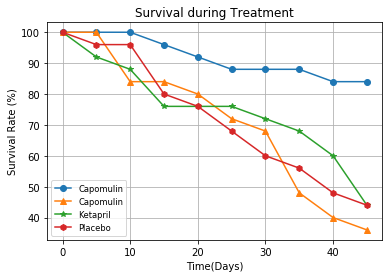

In [146]:
plt.plot(x, pctchange['Capomulin'],marker='o',label='Capomulin')
plt.plot(x, pctchange['Infubinol'],marker='^',label='Capomulin')
plt.plot(x, pctchange['Ketapril'],marker='*',label='Ketapril')
plt.plot(x, pctchange['Placebo'],marker='h',label='Placebo')
plt.grid()
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate (%)")
plt.title('Survival during Treatment')
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.savefig('Survival.png')

## Summary Bar Graph

In [57]:
#calc=response.pct_change(periods=9)*100
pct=(response.loc[45]-response.loc[0])/response.loc[0]*100
pct

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [126]:
pct_change = (pct["Capomulin"],pct["Infubinol"],pct["Ketapril"],pct["Placebo"])
ticks=['Capomulin','Infubinol','Ketapril','Placebo']
fail=[]
passing=[]
for i in pct_change:
    if i>0:
        passing.append(i)
    else:
        fail.append(i)

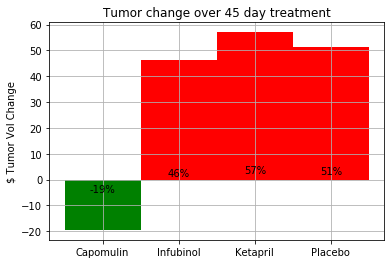

In [145]:
width = 1       # the width of the bars
ind = np.arange(len(pct_change))
fig, ax = plt.subplots()
rect1=ax.bar(ind[0],fail, width,color='g')
rect2=ax.bar(ind[1:],passing,width,color='r')
ax.set_ylabel('$ Tumor Vol Change')
ax.set_title('Tumor change over 45 day treatment')
ax.set_xticks(ind)
ax.set_xticklabels(ticks)
ax.grid()
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., .1*height,'%d' % int(height)+'%',ha='center', va='top')
autolabel(rect1, ax)
autolabel(rect2, ax)
plt.savefig("Tumor_Volume_Change.png")

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)